## 四、字符串操作

### 1 字符串对象方法

In [124]:
val = 'a,b, guido'

print val
print val.split(',')

pieces = [x.strip() for x in val.split(',')] # strip 用于修剪空白符（包括换行符）
print pieces

a,b, guido
['a', 'b', ' guido']
['a', 'b', 'guido']


In [126]:
first, second, third = pieces

print first + '::' + second + '::' + third
print '::'.join(pieces)

print 'guido' in val

a::b::guido
a::b::guido
True


In [127]:
print val.index(',')
print val.find(':') # 注意find和index的区别：找不到时，index引发异常
print val.count(',')

print val.replace(',', '::')
print val.replace(',', '')

1
-1
2
a::b:: guido
ab guido


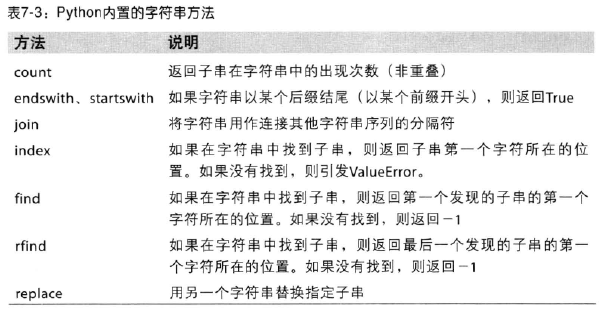

In [128]:
Image(filename="picture\Python built-in string methods.png")

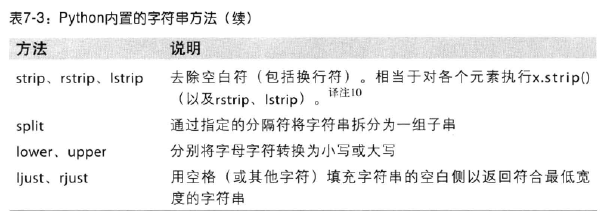

In [129]:
Image(filename="picture\Python built-in string methods 2.png")

### 2 正则表达式

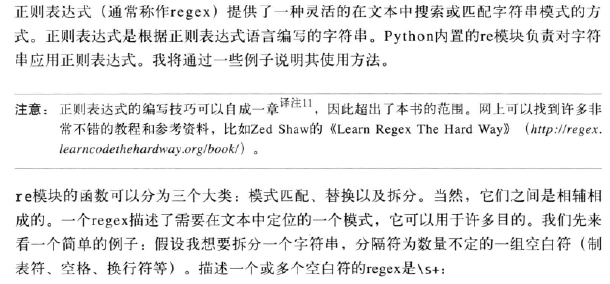

In [131]:
Image(filename="picture\Regular expressions.png")

In [134]:
text = "foo bar\t baz \tqux"

print text
print re.split('\s+', text)

regex = re.compile('\s+') # 编译regex以得到一个可重用的regex对象

print regex
print regex.split(text)
print regex.findall(text) # 只希望得到匹配regex的所有模式

foo bar	 baz 	qux
['foo', 'bar', 'baz', 'qux']
['foo', 'bar', 'baz', 'qux']
[' ', '\t ', ' \t']


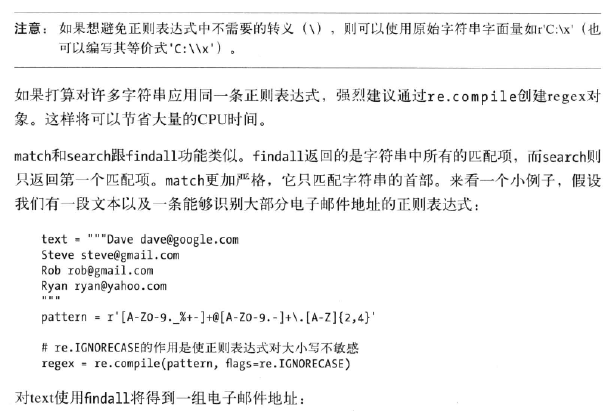

In [135]:
Image(filename="picture\Regular expressions 2.png")

In [142]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

print text
print regex
print regex.findall(text)

Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']


In [143]:
m = regex.search(text) # 返回文本中第一个电子邮件地址

print m
print text[m.start():m.end()]
print regex.match(text) # 只匹配出现在字符串开头的模式
print regex.sub('REDACTED', text) # 匹配到的模式替换为指定字符串

dave@google.com
None
Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [144]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})' # 将地址分为三部分：用户名、域名、域后缀
regex = re.compile(pattern, flags=re.IGNORECASE)
m = regex.match('wesm@bright.net')

print m
print m.groups() # 返回一个有模式各段组成的元组
print regex.findall(text) # 返回元组列表
print regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text) # 通过\1等特殊符号访问各匹配项中的分组

('wesm', 'bright', 'net')
[('dave', 'google', 'com'), ('steve', 'gmail', 'com'), ('rob', 'gmail', 'com'), ('ryan', 'yahoo', 'com')]
Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



In [145]:
regex = re.compile(r"""       
(?P<username>[A-Z0-9._%+-]+)
@
(?P<domain>[A-Z0-9.-]+)
\.
(?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE) # 为各个匹配分组加上一个名称

In [146]:
m = regex.match('wesm@bright.net')

print m
print m.groupdict()

{'username': 'wesm', 'domain': 'bright', 'suffix': 'net'}


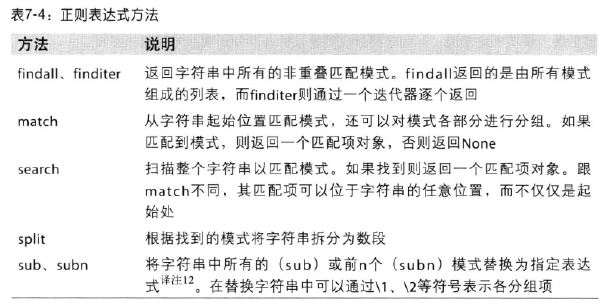

In [138]:
Image(filename="picture\Regular expressions 3.png")

### 3 pandas中矢量化的字符串函数

In [153]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com','Rob': 'rob@gmail.com', 'Wes': np.nan}
print data

data = Series(data)
print data
print data.isnull()

{'Steve': 'steve@gmail.com', 'Wes': nan, 'Dave': 'dave@google.com', 'Rob': 'rob@gmail.com'}
Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object
Dave     False
Rob      False
Steve    False
Wes       True
dtype: bool


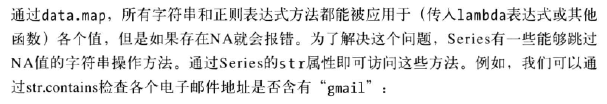

In [155]:
Image(filename="picture\Vectorized string functions in pandas.png")

In [156]:
print data.str.contains('gmail')

print pattern
print data.str.findall(pattern, flags=re.IGNORECASE) # 使用正则表达式

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object
([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})
Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object


In [151]:
matches = data.str.match(pattern, flags=re.IGNORECASE) # 实现矢量化元素获取操作
print matches
print matches.str.get(1) # 1 使用str.get
print matches.str[0] # 2 在str属性上使用索引
print data.str[:5] # 字串截取

Dave     (dave, google, com)
Rob        (rob, gmail, com)
Steve    (steve, gmail, com)
Wes                      NaN
dtype: object
Dave     google
Rob       gmail
Steve     gmail
Wes         NaN
dtype: object
Dave      dave
Rob        rob
Steve    steve
Wes        NaN
dtype: object
Dave     dave@
Rob      rob@g
Steve    steve
Wes        NaN
dtype: object


D:\software\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: In future versions of pandas, match will change to always return a bool indexer.
  if __name__ == '__main__':


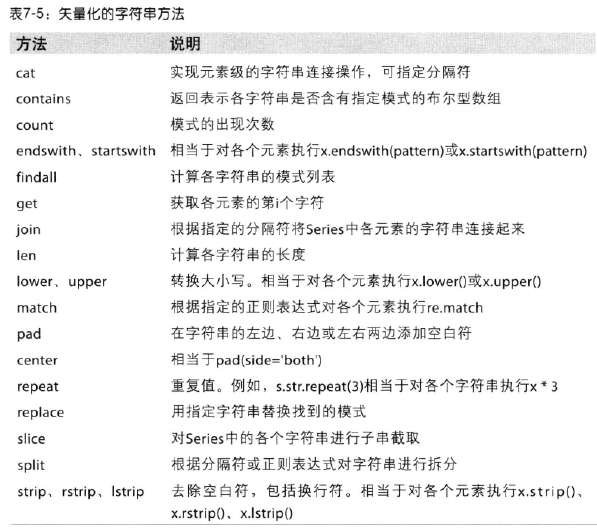

In [157]:
Image(filename="picture\Vectorized string functions in pandas 2.png")

### 4 示例：USDA食品数据库